In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Cargo el dataset procesado

In [18]:

df = pd.read_csv("../data/processed/diabetes_clean.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [19]:

X_train = pd.read_csv("../data/processed/X_train.csv")
X_test  = pd.read_csv("../data/processed/X_test.csv")
y_train = pd.read_csv("../data/processed/y_train.csv").squeeze()
y_test  = pd.read_csv("../data/processed/y_test.csv").squeeze()


In [20]:
rf_base = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_base.fit(X_train, y_train)

y_pred_base = rf_base.predict(X_test)

acc_base = accuracy_score(y_test, y_pred_base)
acc_base


0.7597402597402597

In [28]:
n_estimators_list = [30, 60, 100, 200]
max_depth_list = [None, 3, 5, 10]

results = []

for n in n_estimators_list:
    for depth in max_depth_list:
        rf = RandomForestClassifier(
            n_estimators=n,
            max_depth=depth,
            random_state=42
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        
        acc = accuracy_score(y_test, y_pred)
        
        results.append({
            "n_estimators": n,
            "max_depth": depth,
            "accuracy": acc
        })



In [24]:
results_df = pd.DataFrame(results)
results_df


,n_estimators,max_depth,accuracy
0,30,NaN,0.740260
1,30,3.0,0.727273
2,30,5.0,0.720779
3,30,10.0,0.753247
4,60,NaN,0.746753
5,60,3.0,0.733766
6,60,5.0,0.727273
7,60,10.0,0.740260
8,100,NaN,0.759740
9,100,3.0,0.740260


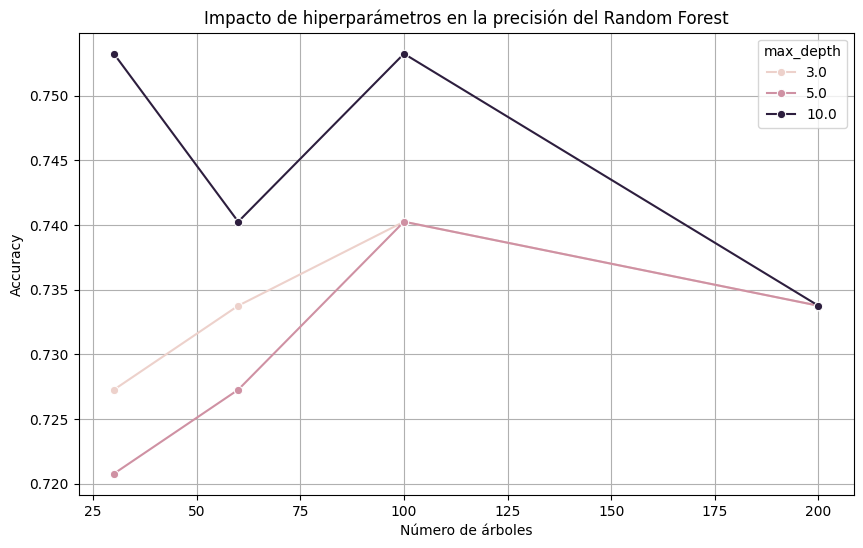

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=results_df,
    x="n_estimators",
    y="accuracy",
    hue="max_depth",
    marker="o"
)

plt.title("Impacto de hiperparámetros en la precisión del Random Forest")
plt.xlabel("Número de árboles")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [26]:
rf_final = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

rf_final.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [27]:
with open("../models/diabetes-random-forest.pkl", "wb") as file:
    pickle.dump(rf_final, file)
